# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Convert InvoiceDate to datetime (if not already done)
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Negative Values:

Quantity and UnitPrice have negative values, likely due to cancellations or data entry errors (to be cleaned later).

In [7]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Country Distribution:
United Kingdom dominates transactions

In [8]:
# Unique values per column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Check for Unexpected Invoice Patterns

Some invoice numbers start with 'C' (for cancellations).

In [9]:
# Count of canceled invoices
df['IsCancelled'] = df['InvoiceNo'].astype(str).str.startswith('C')

In [10]:
df['IsCancelled'].sum()

9288

Check Date Range

Make sure the date range is as expected (Dec 2010 to Dec 2011):

In [11]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

# Task 2 Missing & Duplicated

In [12]:
df.duplicated().sum()

5268

In [13]:
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,False
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,False
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,False
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,False
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,False


In [14]:
df.shape

(541909, 9)

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(536641, 9)

In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
IsCancelled         0
dtype: int64

In [18]:
missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

print(missing_summary)


             Missing Count  Missing %
CustomerID          135037  25.163377
Description           1454   0.270945
InvoiceNo                0   0.000000
StockCode                0   0.000000
Quantity                 0   0.000000
InvoiceDate              0   0.000000
UnitPrice                0   0.000000
Country                  0   0.000000
IsCancelled              0   0.000000


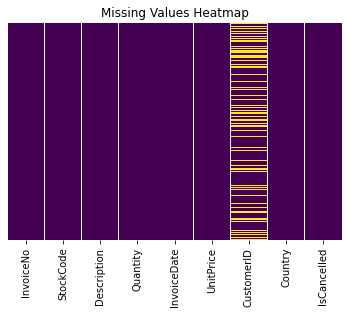

In [19]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [20]:
df[df['CustomerID'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,False
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,False
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,False
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,False
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False


In [21]:
df[df['Description'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,False
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,False
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,False
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,False
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,False
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,False
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,False
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom,False
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,False
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,False


1. Missing CustomerID (25.16%)

Interpretation:
- CustomerID is missing in over 25% of rows, which could impact customer-level analysis like RFM or customer segmentation.
- However, other fields (e.g., InvoiceNo, StockCode, Quantity, etc.) are present, suggesting the transactions are valid.

Options:
- If you are analyzing overall transactions or product sales, you can keep rows with missing CustomerID.
- If you're doing customer-level analysis, you should drop these rows because customer information is crucial.

Solution:
- Approximately 135,080 rows had missing `CustomerID`, which were dropped from the dataset.
- This ensures we retain only transactions with known customers, which is important for accurate customer-level analysis such as segmentation or RFM modeling.

2. Missing Description (0.27%)

Observation:
- Most rows with missing Description also have UnitPrice = 0.0, and often CustomerID is also missing.
- These could be placeholder records, manual corrections, or faulty data.

Options:
- Since the Description is essential for product-level analysis, and these rows are few (only 0.27%), it's safe to drop them.

Solution:
- Since each product has a unique `StockCode`, we used a mapping of known StockCode-Description pairs to fill missing descriptions.
- Remaining missing values (if any) can be considered rare/unidentifiable and left as is.

In [22]:
df.dropna(subset=['CustomerID'], inplace=True)

In [23]:
print("Data shape after dropping:", df.shape)

Data shape after dropping: (401604, 9)


In [24]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
IsCancelled    0
dtype: int64

- Missing `CustomerID` rows were dropped (`dropna(subset=['CustomerID'])`).
- Previously missing `Description` values also disappeared after this operation.
    - This suggests that rows with missing `Description` also had missing `CustomerID`.
- Final check confirms **zero missing values** across all columns.

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [26]:
negative_quantity = df[df['Quantity'] < 0]
print("Negative Quantity rows:", negative_quantity.shape[0])
display(negative_quantity.head())

Negative Quantity rows: 8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True


In [27]:
negative_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,True
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,True


## 🔄 Relationship Between Negative Quantity and Canceled Transactions

- **Total rows with negative `Quantity`**: `8,872`
- **Total rows marked as `IsCancelled = True`**: `8,872`
- ✅ This indicates a **perfect match** between:
  - Negative quantity transactions
  - And canceled invoices (where `InvoiceNo` starts with `'C'`)

### ✅ Conclusion:
> All negative quantity rows are part of canceled transactions. These likely represent returned or refunded items.

This validates the data logic and ensures consistent handling of canceled or returned items in the dataset.


In [28]:
# Rows with zero or negative unit price
invalid_price = df[df['UnitPrice'] <= 0]
print("Zero or Negative UnitPrice rows:", invalid_price.shape[0])
display(invalid_price.head())

Zero or Negative UnitPrice rows: 40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,False
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,False
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,False
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,False
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,False


In [29]:
# Drop rows where UnitPrice is less than or equal to 0
df = df[df['UnitPrice'] > 0]

In [30]:
# Confirm no UnitPrice <= 0 remain
print("Remaining rows with UnitPrice <= 0:", (df['UnitPrice'] <= 0).sum())

Remaining rows with UnitPrice <= 0: 0


In [31]:
# Check new shape of dataset
print("New shape of dataset:", df.shape)

New shape of dataset: (401564, 9)


In [32]:
df = df.reset_index(drop=True)

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


Feature Engineering

In [34]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour 
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

In [35]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,InvoiceMonth,DayOfWeek,Hour,TotalPrice,IsWeekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12,Wednesday,8,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12,Wednesday,8,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12,Wednesday,8,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12,Wednesday,8,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12,Wednesday,8,20.34,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,False,2010-12,Wednesday,8,15.30,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,False,2010-12,Wednesday,8,25.50,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False,2010-12,Wednesday,8,11.10,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False,2010-12,Wednesday,8,11.10,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,False,2010-12,Wednesday,8,54.08,0


In [36]:
df.describe()

,Quantity,UnitPrice,CustomerID,Hour,TotalPrice,IsWeekend
count,401564.000000,401564.000000,401564.000000,401564.000000,401564.000000,401564.000000
mean,12.149911,3.474410,15281.266797,12.730987,20.615691,0.153577
std,249.512649,69.767501,1713.978947,2.288197,430.373603,0.360543
min,-80995.000000,0.001000,12346.000000,6.000000,-168469.600000,0.000000
25%,2.000000,1.250000,13939.000000,11.000000,4.250000,0.000000
50%,5.000000,1.950000,15145.000000,13.000000,11.700000,0.000000
75%,12.000000,3.750000,16788.000000,14.000000,19.800000,0.000000
max,80995.000000,38970.000000,18287.000000,20.000000,168469.600000,1.000000


In [37]:
# DataFrame with only normal (non-cancelled) transactions
normal_df = df[df['IsCancelled'] == False]

# DataFrame with only cancelled transactions
cancelled_df = df[df['IsCancelled'] == True]

In [38]:
normal_df.describe()

,Quantity,UnitPrice,CustomerID,Hour,TotalPrice,IsWeekend
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,12.721532,22.631500,0.155878
std,180.492832,22.241836,1713.539549,2.276661,311.099224,0.362740
min,1.000000,0.001000,12346.000000,6.000000,0.001000,0.000000
25%,2.000000,1.250000,13955.000000,11.000000,4.950000,0.000000
50%,6.000000,1.950000,15150.000000,13.000000,12.450000,0.000000
75%,12.000000,3.750000,16791.000000,14.000000,19.800000,0.000000
max,80995.000000,8142.750000,18287.000000,20.000000,168469.600000,1.000000


 Methods to Handle Outliers and Skewed Data
We'll focus on:

Cleaning extreme outliers

Transforming skewed data

Visualizing effectively

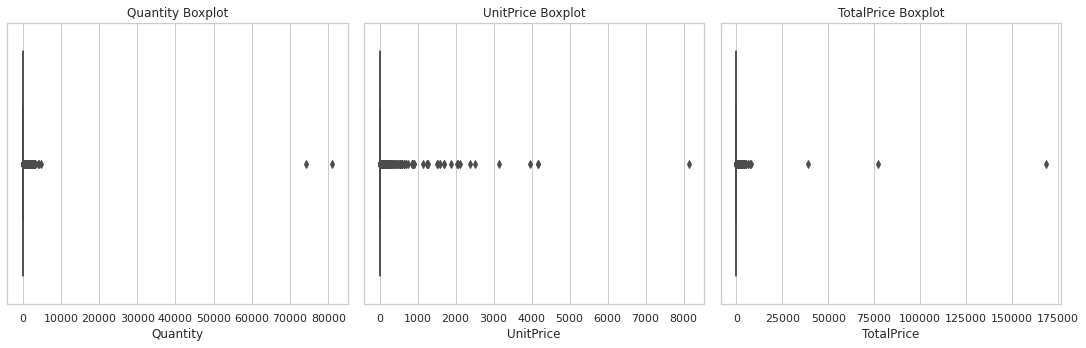

In [39]:
# Set plot style
sns.set(style="whitegrid")

# Plot boxplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(['Quantity', 'UnitPrice', 'TotalPrice']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=normal_df[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


In [40]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

outlier_summary = {}
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    outliers, lower, upper = detect_outliers_iqr(normal_df, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'lower_bound': lower,
        'upper_bound': upper,
        'percent': len(outliers) / len(normal_df) * 100
    }

# Display outlier summary
pd.DataFrame(outlier_summary).T


,count,lower_bound,upper_bound,percent
Quantity,25616.0,-13.000,27.000,6.523178
UnitPrice,34112.0,-2.500,7.500,8.686706
TotalPrice,31231.0,-17.325,42.075,7.953052


EDA

In [53]:
# General info
print(normal_df.info())

# Summary statistics
display(normal_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 401563
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392692 non-null  object        
 1   StockCode     392692 non-null  object        
 2   Description   392692 non-null  object        
 3   Quantity      392692 non-null  int64         
 4   InvoiceDate   392692 non-null  datetime64[ns]
 5   UnitPrice     392692 non-null  float64       
 6   CustomerID    392692 non-null  float64       
 7   Country       392692 non-null  object        
 8   IsCancelled   392692 non-null  bool          
 9   InvoiceMonth  392692 non-null  period[M]     
 10  DayOfWeek     392692 non-null  object        
 11  Hour          392692 non-null  int64         
 12  TotalPrice    392692 non-null  float64       
 13  IsWeekend     392692 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(5), peri

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,InvoiceMonth,DayOfWeek,Hour,TotalPrice,IsWeekend
count,392692.0,392692,392692,392692.000000,392692,392692.000000,392692.000000,392692,392692,392692,392692,392692.000000,392692.000000,392692.000000
unique,18532.0,3665,3877,NaN,17282,NaN,NaN,37,1,13,6,NaN,NaN,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,False,2011-11,Thursday,NaN,NaN,NaN
freq,542.0,2023,2016,NaN,542,NaN,NaN,349203,392692,63168,79243,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.119702,NaN,3.125914,15287.843865,NaN,NaN,NaN,NaN,12.721532,22.631500,0.155878
std,NaN,NaN,NaN,180.492832,NaN,22.241836,1713.539549,NaN,NaN,NaN,NaN,2.276661,311.099224,0.362740
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN,NaN,NaN,NaN,6.000000,0.001000,0.000000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13955.000000,NaN,NaN,NaN,NaN,11.000000,4.950000,0.000000


Missing values:
 Series([], dtype: int64)


📌 3. Revenue and Sales Trends Over Time

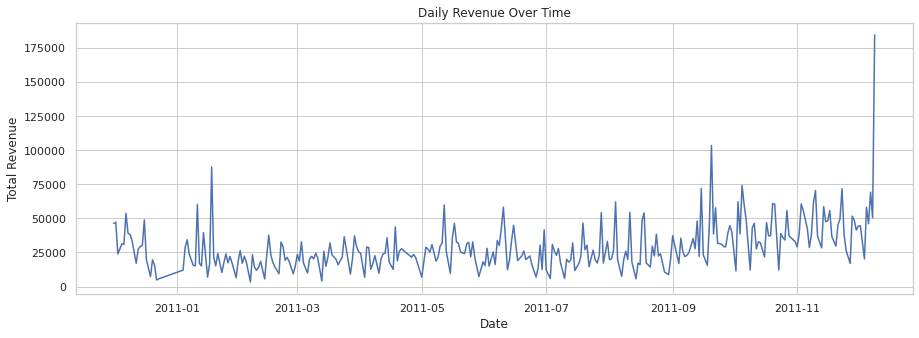

In [57]:
#a. Sales Over Time (Daily)
daily_sales = normal_df.groupby(normal_df['InvoiceDate'].dt.date)['TotalPrice'].sum()
plt.figure(figsize=(15,5))
daily_sales.plot()
plt.title("Daily Revenue Over Time")
plt.ylabel("Total Revenue")
plt.xlabel("Date")
plt.grid(True)
plt.show()


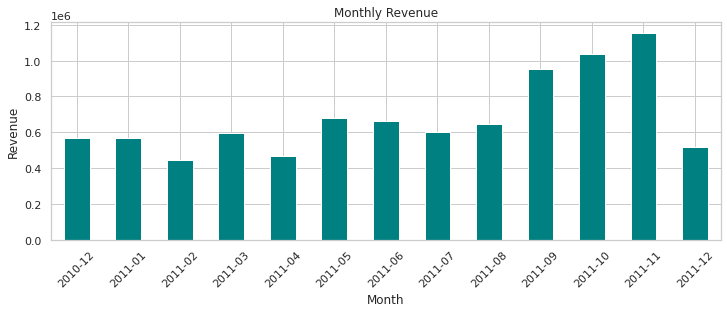

In [58]:
#b. Monthly Revenue
monthly_revenue = normal_df.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_revenue.plot(kind='bar', figsize=(12,4), color='teal')
plt.title("Monthly Revenue")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


📌 4. Top Products by Quantity and Revenue

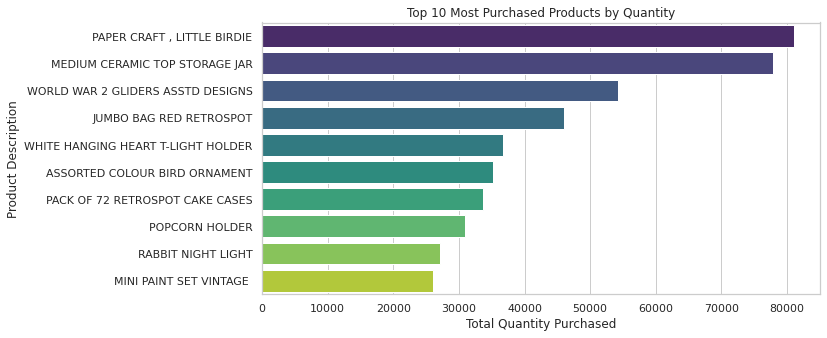

In [59]:
#Most Purchased Products (by Quantity)
top_qty = normal_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_qty.values, y=top_qty.index, palette='viridis')
plt.title("Top 10 Most Purchased Products by Quantity")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Product Description")
plt.show()


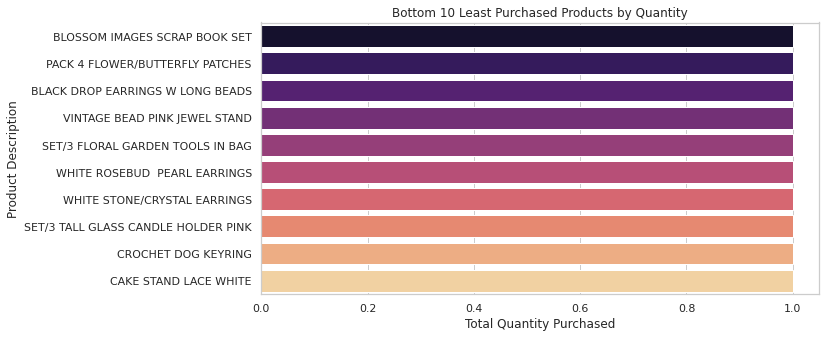

In [60]:
#Least Purchased Products (by Quantity)
bottom_qty = normal_df.groupby('Description')['Quantity'].sum().sort_values().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=bottom_qty.values, y=bottom_qty.index, palette='magma')
plt.title("Bottom 10 Least Purchased Products by Quantity")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Product Description")
plt.show()


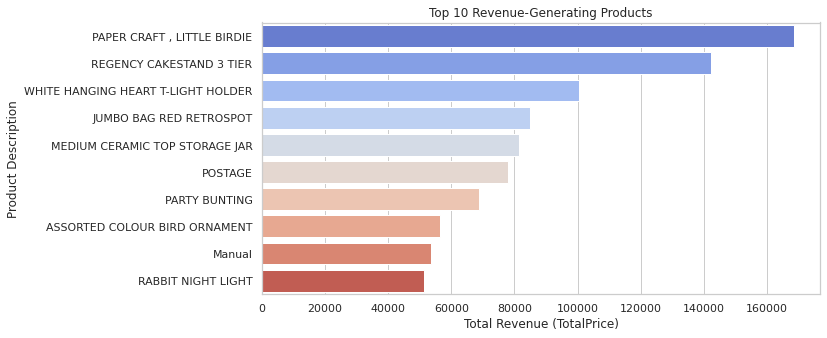

In [61]:
#Top Revenue-Generating Products (by TotalPrice)
top_revenue = normal_df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette='coolwarm')
plt.title("Top 10 Revenue-Generating Products")
plt.xlabel("Total Revenue (TotalPrice)")
plt.ylabel("Product Description")
plt.show()


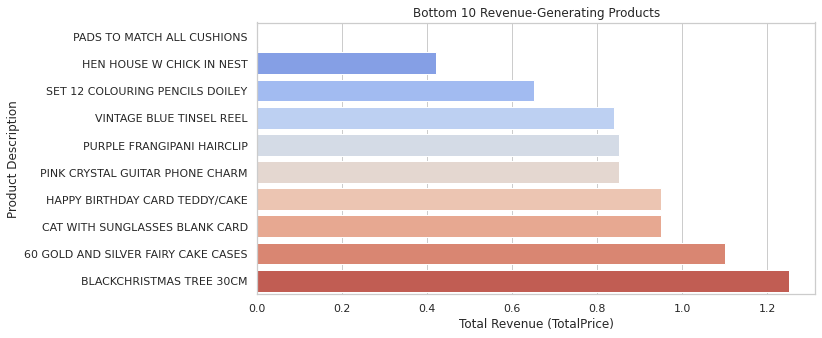

In [66]:
#Lowest Revenue-Generating Products (by TotalPrice)
bottom_revenue = normal_df.groupby('Description')['TotalPrice'].sum().sort_values().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=bottom_revenue.values, y=bottom_revenue.index, palette='coolwarm')
plt.title("Bottom 10 Revenue-Generating Products")
plt.xlabel("Total Revenue (TotalPrice)")
plt.ylabel("Product Description")
plt.show()


📌 5. Top Countries by Sales

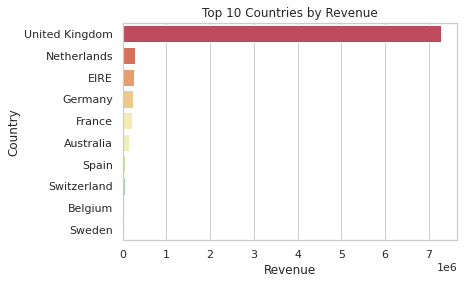

In [67]:
top_countries = normal_df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Spectral')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


📌 7. Sales by Hour & Day of Week

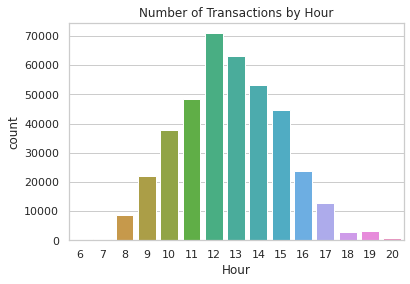

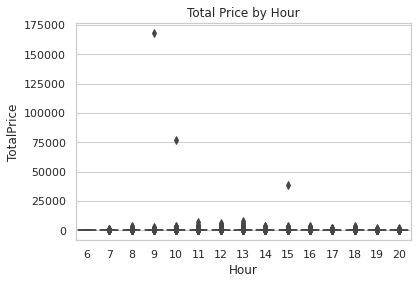

In [69]:
# By hour
sns.countplot(x="Hour", data=normal_df)
plt.title("Number of Transactions by Hour")
plt.show()

sns.boxplot(x="Hour", y="TotalPrice", data=normal_df)
plt.title("Total Price by Hour")
plt.show()

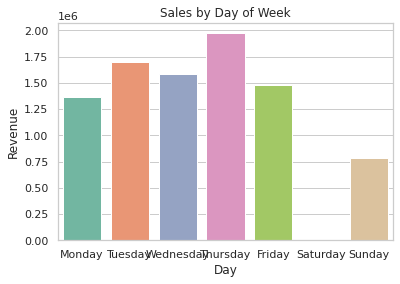

In [70]:
# By day of week
dow_sales = normal_df.groupby('DayOfWeek')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
sns.barplot(x=dow_sales.index, y=dow_sales.values, palette='Set2')
plt.title("Sales by Day of Week")
plt.ylabel("Revenue")
plt.xlabel("Day")
plt.show()

📌 8. Sales on Weekends vs Weekdays

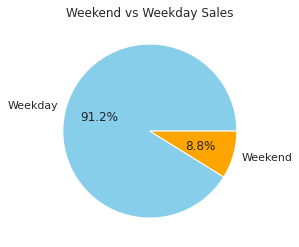

In [71]:
weekend_sales = normal_df.groupby('IsWeekend')['TotalPrice'].sum()
plt.pie(weekend_sales, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title("Weekend vs Weekday Sales")
plt.show()


📌 9. Correlation Heatmap

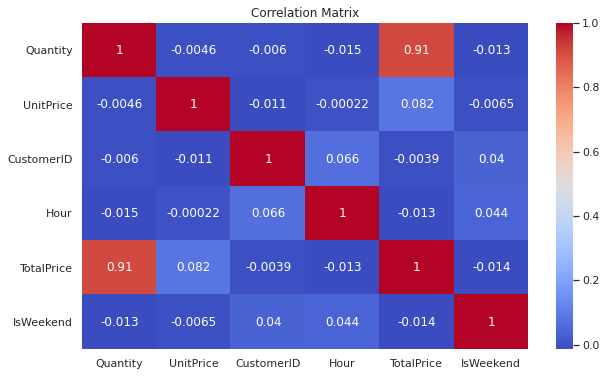

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(normal_df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


📌 10. Customer Behavior

In [73]:
#a. Repeat Customers
customer_freq = normal_df['CustomerID'].value_counts()
repeat_rate = (customer_freq > 1).mean()
print(f"Repeat Customer Rate: {repeat_rate:.2%}")


Repeat Customer Rate: 98.36%


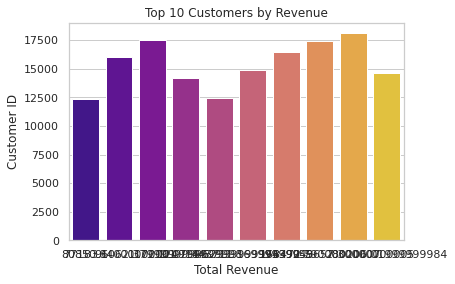

In [75]:
#b. Customer Lifetime Value (CLV)
clv = normal_df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=clv.values, y=clv.index, palette='plasma')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.show()


📌 6. Cancelled Orders

In [78]:
cancelled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8872 entries, 141 to 401372
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     8872 non-null   object        
 1   StockCode     8872 non-null   object        
 2   Description   8872 non-null   object        
 3   Quantity      8872 non-null   int64         
 4   InvoiceDate   8872 non-null   datetime64[ns]
 5   UnitPrice     8872 non-null   float64       
 6   CustomerID    8872 non-null   float64       
 7   Country       8872 non-null   object        
 8   IsCancelled   8872 non-null   bool          
 9   InvoiceMonth  8872 non-null   period[M]     
 10  DayOfWeek     8872 non-null   object        
 11  Hour          8872 non-null   int64         
 12  TotalPrice    8872 non-null   float64       
 13  IsWeekend     8872 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(5), period[M](1)
memory 

In [79]:
cancelled_df.describe()

,Quantity,UnitPrice,CustomerID,Hour,TotalPrice,IsWeekend
count,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953,13.149459,-68.607920,0.051736
std,1172.249902,445.190864,1708.230387,2.718147,2022.869636,0.221506
min,-80995.000000,0.010000,12346.000000,6.000000,-168469.600000,0.000000
25%,-6.000000,1.450000,13505.000000,11.000000,-17.000000,0.000000
50%,-2.000000,2.950000,14868.000000,13.000000,-8.500000,0.000000
75%,-1.000000,4.950000,16393.000000,15.000000,-3.300000,0.000000
max,-1.000000,38970.000000,18282.000000,20.000000,-0.120000,1.000000


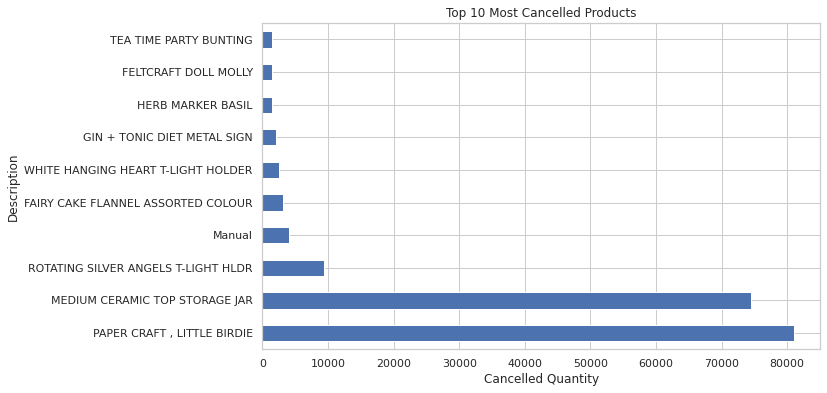

In [82]:
#$Top Cancelled Products
top_cancelled_products = cancelled_df.groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False).head(10)
top_cancelled_products.plot(kind='barh', figsize=(10, 6), title="Top 10 Most Cancelled Products")
plt.xlabel("Cancelled Quantity")
plt.show()


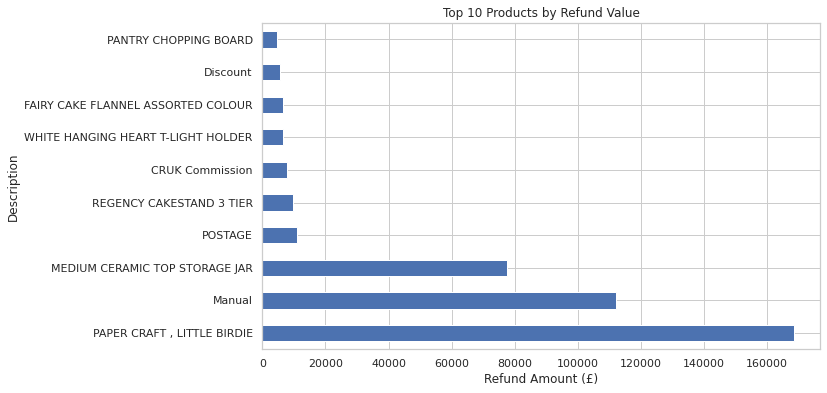

In [83]:
#Highest Refund Value Products
top_refunded_products = cancelled_df.groupby('Description')['TotalPrice'].sum().abs().sort_values(ascending=False).head(10)
top_refunded_products.plot(kind='barh', figsize=(10, 6), title="Top 10 Products by Refund Value")
plt.xlabel("Refund Amount (£)")
plt.show()


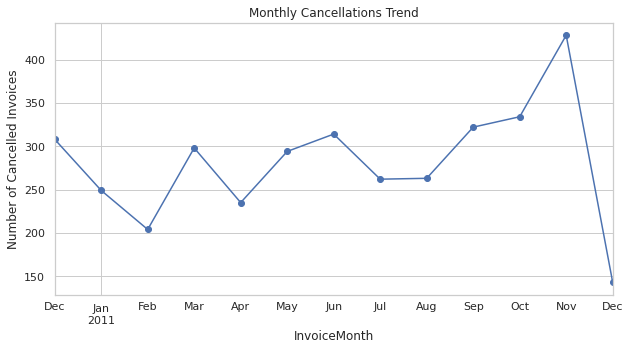

In [84]:
#Cancellations Over Time
monthly_cancellations = cancelled_df.groupby('InvoiceMonth')['InvoiceNo'].nunique()
monthly_cancellations.plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Cancellations Trend')
plt.ylabel("Number of Cancelled Invoices")
plt.show()


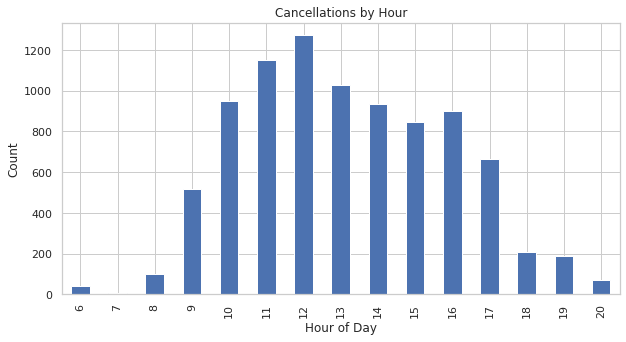

In [86]:
#Cancellations by Hour
cancelled_df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title="Cancellations by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()


In [87]:
#Top Cancelled Invoices (by value)
top_cancelled_invoices = cancelled_df.groupby('InvoiceNo')['TotalPrice'].sum().sort_values().head(10)
print(top_cancelled_invoices)


InvoiceNo
C581484   -168469.60
C541433    -77183.60
C556445    -38970.00
C550456    -22998.40
C570556     -9466.56
C573079     -8322.12
C551685     -8142.75
C551699     -6930.00
C571750     -6068.06
C562375     -4345.10
Name: TotalPrice, dtype: float64


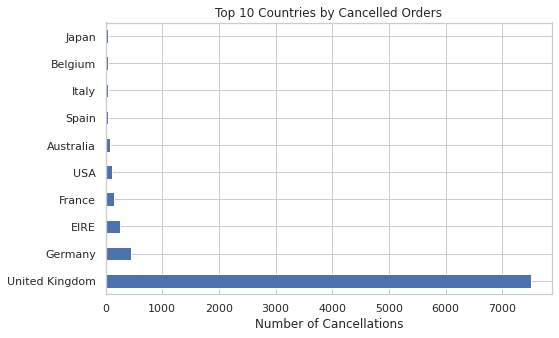

In [89]:
#Cancellations by Country
cancelled_by_country = cancelled_df['Country'].value_counts().head(10)
cancelled_by_country.plot(kind='barh', figsize=(8, 5), title="Top 10 Countries by Cancelled Orders")
plt.xlabel("Number of Cancellations")
plt.show()
